In [1]:
def merge(l,r):
    result = []
    while l and r:
        if l[0] < r[0]:
            result.append(l[0])
            l.pop(0)
        else:
            result.append(r[0])
            r.pop(0)
    while l:
        result.append(l[0])
        l.pop(0)
    while r:
        result.append(r[0])
        r.pop(0)
    return result

In [2]:
def merge_sort(l):

    if len(l) < 2:
        return l
    
    left = []
    right = []
    middle = len(l)//2

    left = l[:middle]
    right = l[middle:]

    left = merge_sort(left)
    right = merge_sort(right)

    return merge(left,right)

In [3]:
def insertion_sort(input_list):
    l = input_list[:]
    for i in range(1,len(l)):
        idx = i
        while idx > 0 and l[idx-1] > l[idx]:
            x = l[idx]
            l[idx] = l[idx-1]
            l[idx-1] = x
            idx -= 1
    return l

In [4]:
import numpy as np
import pandas as pd
import timeit
minimum = 1
maximum = 100
step = 1
seed = 1

gen = np.random.default_rng(seed=seed)

cols = ["n","merge_time", "insertion_time"]

times = []

for n in range(minimum,maximum,step):
    testarr = np.random.randint(low = 1, high=1000000000 ,size=n)
    test1 = testarr.tolist()
    test2 = testarr.tolist()

    t1 = timeit.Timer(lambda: merge_sort(test1[:]))
    t2 = timeit.Timer(lambda: insertion_sort(test2[:]))
    t1_time = t1.repeat(30,50)
    t2_time = t2.repeat(30,50)
    times.append([n,min(t1_time),min(t2_time)])
df = pd.DataFrame(times, columns=cols)


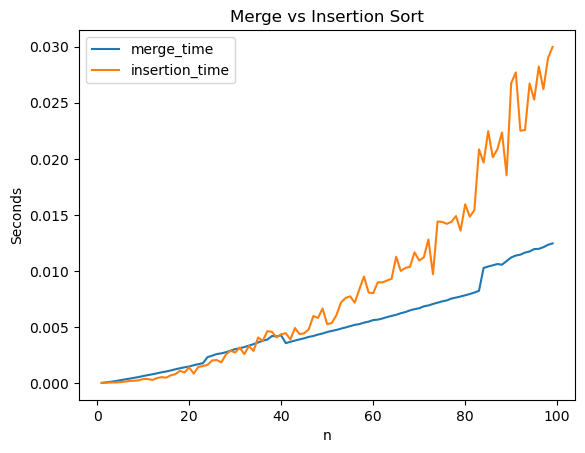

In [5]:
plot = df.plot(x="n",title="Merge vs Insertion Sort",xlabel="n",ylabel="Seconds")